In [1]:
# Install the library into this environment if you haven't already
# !pip install daesim-preprocess

In [2]:
from DAESIM_preprocess.slga_soils import slga_soils, slga_soils_abbrevations, identifiers

In [3]:
import rioxarray as rxr
import matplotlib.pyplot as plt

# Basic Example

In [4]:
# Example variables
variables = ["Clay", "Sand"]

lat = -34.3890427
lon=148.469499
buffer = 0.01  # Degrees in each direction (so ~2kmx2km)

In [5]:
# The main function
slga_soils(variables, lat, lon, buffer)

Starting slga_soils
Downloaded TEST_Clay_5-15cm.tif
Downloaded TEST_Sand_5-15cm.tif


<xarray.DataArray (y: 24, x: 24)> Size: 2kB
[576 values with dtype=float32]
Coordinates:
  * x            (x) float64 192B 148.5 148.5 148.5 148.5 ... 148.5 148.5 148.5
  * y            (y) float64 192B -34.38 -34.38 -34.38 ... -34.4 -34.4 -34.4
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

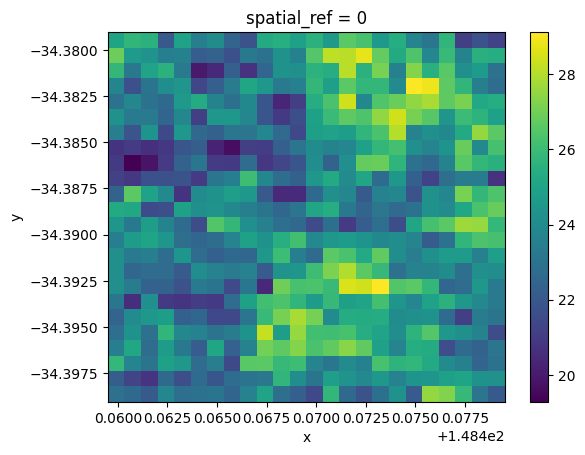

In [6]:
# Example visualisation
# I recommend also opening this file in QGIS to double check it's geolocated correctly
da = rxr.open_rasterio('TEST_Clay_5-15cm.tif').isel(band=0).drop_vars('band')
da.plot()
da

# More examples

In [7]:
# Retrieving a single variable
print(f"Options: {list(slga_soils_abbrevations.keys())}\n")
slga_soils(variables=['Silt'], lat=lat, lon=lon, buffer=buffer)

Options: ['Clay', 'Silt', 'Sand', 'pH_CaCl2', 'Bulk_Density', 'Available_Water_Capacity', 'Effective_Cation_Exchange_Capacity', 'Total_Nitrogen', 'Total_Phosphorus']

Starting slga_soils
Downloaded TEST_Silt_5-15cm.tif


In [8]:
# Retrieving a different depth
print(f"Options: {list(identifiers.keys())}\n")
slga_soils(variables=['Silt'], lat=lat, lon=lon, buffer=buffer, depths=["60-100cm"])

Options: ['5-15cm', '15-30cm', '30-60cm', '60-100cm']

Starting slga_soils
Downloaded TEST_Silt_60-100cm.tif


In [9]:
# Retrieving a single point
slga_soils(variables=variables, lat=lat, lon=lon, buffer=0)

Starting slga_soils
Failed to download Clay 5-15cm, attempt 1 of 3 502 Server Error: Proxy Error for url: https://www.asris.csiro.au/arcgis/services/TERN/CLY_ACLEP_AU_NAT_C/MapServer/WCSServer?service=WCS&request=GetCapabilities&version=1.0.0
Retrying in 10.00 seconds...
Downloaded TEST_Clay_5-15cm.tif
Downloaded TEST_Sand_5-15cm.tif


In [10]:
# Giving the files a new name
ds = slga_soils(variables=variables, lat=lat, lon=lon, buffer=buffer,
                 stub="NEW_STUB")

Starting slga_soils
Downloaded NEW_STUB_Clay_5-15cm.tif
Downloaded NEW_STUB_Sand_5-15cm.tif


In [11]:
# Saving the results in a new location
import os
if not os.path.exists('outdir'):
    os.mkdir('outdir')
ds = slga_soils(variables=variables, lat=lat, lon=lon, buffer=buffer, outdir='outdir')

Starting slga_soils
Downloaded outdir/TEST_Clay_5-15cm.tif
Downloaded outdir/TEST_Sand_5-15cm.tif


# Useful resources
- Source code: https://github.com/ChristopherBradley/DAESIM_preprocess/blob/main/src/DAESIM_preprocess/silo_daily.py
- SLGA catalog: https://www.asris.csiro.au/arcgis/rest/services/TERN

# References
- Rossel RV, Chen C, Grundy MJ, Searle R, Clifford D, Campbell PH (2015) The Australian three-dimensional soil grid: Australia’s contribution to the GlobalSoilMap project, Soil Research, 53(8):845-64, doi.org/10.1071/SR14366